# <p style="text-align: center;"> Deep-Learning Mini-Project 1 : </p>
# <p style="text-align: center;"> Image Classification and Regression </p>

#### <p style="text-align: center;"> Clément RIU </p>

#### <p style="text-align: center;"> 07/12/2018 </p>


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from keras.utils.np_utils import to_categorical



# On some implementations of matplotlib, you may need to change this value
IMAGE_SIZE = 72

def generate_a_drawing(figsize, U, V, noise=0.0):
    fig = plt.figure(figsize=(figsize,figsize))
    ax = plt.subplot(111)
    plt.axis('Off')
    ax.set_xlim(0,figsize)
    ax.set_ylim(0,figsize)
    ax.fill(U, V, "k")
    fig.canvas.draw()
    imdata = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)[::3].astype(np.float32)
    imdata = imdata + noise * np.random.random(imdata.size)
    plt.close(fig)
    return imdata

def generate_a_rectangle(noise=0.0, free_location=False):
    figsize = 1.0
    U = np.zeros(4)
    V = np.zeros(4)
    if free_location:
        corners = np.random.random(4)
        top = max(corners[0], corners[1])
        bottom = min(corners[0], corners[1])
        left = min(corners[2], corners[3])
        right = max(corners[2], corners[3])
    else:
        side = (0.3 + 0.7 * np.random.random()) * figsize
        top = figsize/2 + side/2
        bottom = figsize/2 - side/2
        left = bottom
        right = top
    U[0] = U[1] = top
    U[2] = U[3] = bottom
    V[0] = V[3] = left
    V[1] = V[2] = right
    return generate_a_drawing(figsize, U, V, noise)

def generate_a_disk(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        center = np.random.random(2)
    else:
        center = (figsize/2, figsize/2)
    radius = (0.3 + 0.7 * np.random.random()) * figsize/2
    N = 50
    U = np.zeros(N)
    V = np.zeros(N)
    i = 0
    for t in np.linspace(0, 2*np.pi, N):
        U[i] = center[0] + np.cos(t) * radius
        V[i] = center[1] + np.sin(t) * radius
        i = i + 1
    return generate_a_drawing(figsize, U, V, noise)

def generate_a_triangle(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        U = np.random.random(3)
        V = np.random.random(3)
    else:
        size = (0.3 + 0.7 * np.random.random())*figsize/2
        middle = figsize/2
        U = (middle, middle+size, middle-size)
        V = (middle+size, middle-size, middle-size)
    imdata = generate_a_drawing(figsize, U, V, noise)
    return [imdata, [U[0], V[0], U[1], V[1], U[2], V[2]]]

def generate_dataset_classification(nb_samples, noise=0.0, free_location=False):
    # Getting im_size:
    im_size = generate_a_rectangle().shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros(nb_samples)
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i)
        category = np.random.randint(3)
        if category == 0:
            X[i] = generate_a_rectangle(noise, free_location)
        elif category == 1:
            X[i] = generate_a_disk(noise, free_location)
        else:
            [X[i], V] = generate_a_triangle(noise, free_location)
        Y[i] = category
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]


def generate_test_set_classification():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_classification(300, 20, True)
    Y_test = to_categorical(Y_test, 3)
    return [X_test, Y_test]

def generate_dataset_regression(nb_samples, noise=0.0):
    # Getting im_size:
    im_size = generate_a_triangle()[0].shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros([nb_samples, 6])
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i)
        [X[i], Y[i]] = generate_a_triangle(noise, True)
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]

import matplotlib.patches as patches

def visualize_prediction(x, y):
    fig, ax = plt.subplots(figsize=(5, 5))
    I = x.reshape((IMAGE_SIZE,IMAGE_SIZE))
    ax.imshow(I, extent=[-0.15,1.15,-0.15,1.15],cmap='gray')
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])

    xy = y.reshape(3,2)
    tri = patches.Polygon(xy, closed=True, fill = False, edgecolor = 'r', linewidth = 5, alpha = 0.5)
    ax.add_patch(tri)

    plt.show()

def generate_test_set_regression():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_regression(300, 20)
    return [X_test, Y_test]

Using TensorFlow backend.


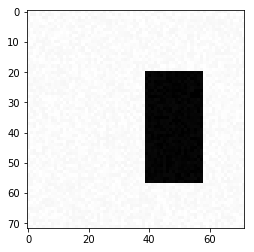

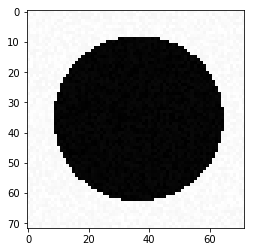

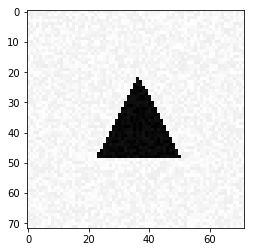

In [2]:
im = generate_a_rectangle(10, True)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
plt.show()
im = generate_a_disk(10)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
plt.show()
[im, v] = generate_a_triangle(20, False)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
plt.show()

## 3 Simple Classification

In [3]:
NB_image = 3000

In [4]:
[X_train, Y_train] = generate_dataset_classification(NB_image, 20)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000
1010
1020
1030
1040
1050
1060
1070
1080
1090
1100
1110
1120
1130
1140
1150
1160
1170
1180
1190
1200
1210
1220
1230
1240
1250
1260
1270
1280
1290
1300
1310
1320
1330
1340
1350
1360
1370
1380
1390
1400
1410
1420
1430
1440
1450
1460
1470
1480
1490
1500
1510
1520
1530
1540
1550
1560
1570
1580
1590
1600
1610
1620
1630
1640
1650
1660
1670
1680
1690
1700
1710
1720
1730
1740
1750
1760
1770
1780
1790
1800
1810
1820
1830
1840
1850
1860
1870
1880
1890
1900
1910
1920
1930
1940
1950
1960
1970
1980
1990
2000
2010
2020
2030
2040
2050
2060
2070
2080
2090
2100
2110
2120
2130
2140
2150
2160
2170
2180
2

In [5]:
Y_train_bin = to_categorical(Y_train)

In [6]:
from keras.optimizers import SGD, Adam
sgd = SGD(lr=0.001,
          decay=1e-6,
          momentum=0.9,
          nesterov=True)
adam = Adam(lr=0.0001,
            beta_1=0.9,
            beta_2=0.999,
            epsilon=None,
            decay=0.0,
            amsgrad=False)

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Activation
nb_neurons1 = 3
model = Sequential([
    Dense(nb_neurons1, input_shape=(X_train.shape[1],)),
    Activation('softmax'),
])

In [8]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam')

In [9]:
epochs=50

In [10]:
model.fit(X_train, Y_train_bin, epochs=epochs, batch_size=32)

Epoch 1/50
3000/3000 [==============================] - 0s 94us/step - loss: 0.6015
Epoch 2/50
3000/3000 [==============================] - 0s 52us/step - loss: 0.1349
Epoch 3/50
3000/3000 [==============================] - 0s 61us/step - loss: 0.0714
Epoch 4/50
3000/3000 [==============================] - 0s 67us/step - loss: 0.0422
Epoch 5/50
3000/3000 [==============================] - 0s 53us/step - loss: 0.0285
Epoch 6/50
3000/3000 [==============================] - 0s 53us/step - loss: 0.0224
Epoch 7/50
3000/3000 [==============================] - 0s 58us/step - loss: 0.0181
Epoch 8/50
3000/3000 [==============================] - 0s 63us/step - loss: 0.0136
Epoch 9/50
3000/3000 [==============================] - 0s 59us/step - loss: 0.0109
Epoch 10/50
3000/3000 [==============================] - 0s 57us/step - loss: 0.0091
Epoch 11/50
3000/3000 [==============================] - 0s 57us/step - loss: 0.0076
Epoch 12/50
3000/3000 [==============================] - 0s 56us/step - lo

In [11]:
X_test0 = generate_a_rectangle()
print(X_test0)
X_test0 = X_test0.reshape(1, X_test0.shape[0])
model.predict(X_test0)

[255. 255. 255. ... 255. 255. 255.]


array([[1., 0., 0.]], dtype=float32)

In [12]:
X_test2 = generate_a_disk()
print(X_test2)
X_test2 = X_test2.reshape(1, X_test2.shape[0])
model.predict(X_test2)

[255. 255. 255. ... 255. 255. 255.]


array([[0., 1., 0.]], dtype=float32)

In [13]:
X_test1 = generate_a_triangle()[0]
print(X_test1)
X_test1 = X_test1.reshape(1, X_test1.shape[0])
model.predict(X_test1)

[255. 255. 255. ... 255. 255. 255.]


array([[0., 0., 1.]], dtype=float32)

We observe on the three different forms the expected output : $[1, 0, 0]$ for rectangle, $[0, 1, 0]$ for disk and $[0, 0, 1]$ for triangle.

## 4 Visualisation of the Solution

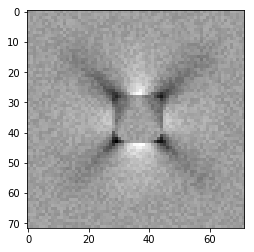

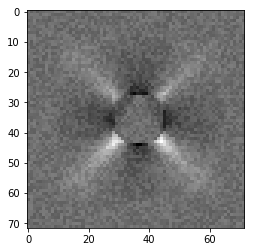

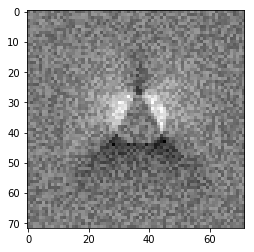

In [14]:
weights = model.get_weights()[0]
for i in range (weights.shape[1]):
    im = weights[:, i]
    plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
    plt.show()

We can clearly see the different shapes appear in the weights matrix.

## 5 A More Difficult Classification Problem

In [15]:
[X_train, Y_train] = generate_dataset_classification(NB_image, 20, True)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000
1010
1020
1030
1040
1050
1060
1070
1080
1090
1100
1110
1120
1130
1140
1150
1160
1170
1180
1190
1200
1210
1220
1230
1240
1250
1260
1270
1280
1290
1300
1310
1320
1330
1340
1350
1360
1370
1380
1390
1400
1410
1420
1430
1440
1450
1460
1470
1480
1490
1500
1510
1520
1530
1540
1550
1560
1570
1580
1590
1600
1610
1620
1630
1640
1650
1660
1670
1680
1690
1700
1710
1720
1730
1740
1750
1760
1770
1780
1790
1800
1810
1820
1830
1840
1850
1860
1870
1880
1890
1900
1910
1920
1930
1940
1950
1960
1970
1980
1990
2000
2010
2020
2030
2040
2050
2060
2070
2080
2090
2100
2110
2120
2130
2140
2150
2160
2170
2180
2

In [16]:
Y_train_bin = to_categorical(Y_train)

In [17]:
from keras.models import Sequential
from keras.layers import Dense, Activation
nb_neurons1 = 3
model = Sequential([
    Dense(nb_neurons1, input_shape=(X_train.shape[1],)),
    Activation('softmax'),
])

In [18]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']
             )

In [19]:
model.fit(X_train, Y_train_bin, epochs=epochs, batch_size=32)

Epoch 1/50
3000/3000 [==============================] - 0s 110us/step - loss: 1.2845 - acc: 0.4540
Epoch 2/50
3000/3000 [==============================] - 0s 55us/step - loss: 0.9150 - acc: 0.5413
Epoch 3/50
3000/3000 [==============================] - 0s 58us/step - loss: 0.9200 - acc: 0.5353
Epoch 4/50
3000/3000 [==============================] - 0s 56us/step - loss: 0.9479 - acc: 0.5690
Epoch 5/50
3000/3000 [==============================] - 0s 63us/step - loss: 0.8220 - acc: 0.6020
Epoch 6/50
3000/3000 [==============================] - 0s 56us/step - loss: 0.9479 - acc: 0.5837
Epoch 7/50
3000/3000 [==============================] - 0s 61us/step - loss: 0.8936 - acc: 0.6010
Epoch 8/50
3000/3000 [==============================] - 0s 61us/step - loss: 0.8674 - acc: 0.6013
Epoch 9/50
3000/3000 [==============================] - 0s 58us/step - loss: 0.8041 - acc: 0.6080
Epoch 10/50
3000/3000 [==============================] - 0s 63us/step - loss: 0.8115 - acc: 0.6103
Epoch 11/50
3000/3

In [20]:
[X_test, Y_test] = generate_test_set_classification()

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [21]:
model.evaluate(X_test, Y_test)

300/300 [==============================] - 0s 122us/step


[0.741676074663798, 0.6500000003973643]

Here we can see that the accuracy is around $60\%$ which means the algorithm can learn a linear separation but it is not enough to completely separate the shapes.

In [22]:
X_train_carre = X_train.reshape(-1, IMAGE_SIZE, IMAGE_SIZE, 1)

In [23]:
X_train_carre.shape

(3000, 72, 72, 1)

In [24]:
from keras.layers import Conv2D, MaxPooling2D, Flatten

model_conv = Sequential([
    Conv2D(16, (5, 5), input_shape=(IMAGE_SIZE, IMAGE_SIZE, 1)),
    Activation('tanh'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(3),
    Activation('softmax'),
])

In [25]:
model_conv.compile(loss='categorical_crossentropy',
                   optimizer='adam',
                   metrics=['accuracy']
                  )

In [26]:
epochs=50

In [27]:
model_conv.fit(X_train_carre, Y_train_bin, epochs=epochs, batch_size=32)

Epoch 1/50
3000/3000 [==============================] - 4s 1ms/step - loss: 0.9296 - acc: 0.6010
Epoch 2/50
3000/3000 [==============================] - 4s 1ms/step - loss: 0.6499 - acc: 0.7497
Epoch 3/50
3000/3000 [==============================] - 4s 1ms/step - loss: 0.5559 - acc: 0.7963
Epoch 4/50
3000/3000 [==============================] - 4s 1ms/step - loss: 0.4699 - acc: 0.8433
Epoch 5/50
3000/3000 [==============================] - 4s 1ms/step - loss: 0.4145 - acc: 0.8640
Epoch 6/50
3000/3000 [==============================] - 4s 1ms/step - loss: 0.3643 - acc: 0.8813
Epoch 7/50
3000/3000 [==============================] - 4s 1ms/step - loss: 0.3231 - acc: 0.8993
Epoch 8/50
3000/3000 [==============================] - 4s 1ms/step - loss: 0.2670 - acc: 0.9230
Epoch 9/50
3000/3000 [==============================] - 4s 1ms/step - loss: 0.2380 - acc: 0.9353
Epoch 10/50
3000/3000 [==============================] - 4s 1ms/step - loss: 0.2101 - acc: 0.9500
Epoch 11/50
3000/3000 [======

In [28]:
X_test_carre = X_test.reshape(-1, IMAGE_SIZE, IMAGE_SIZE, 1)

In [29]:
model_conv.evaluate(X_test_carre, Y_test)

300/300 [==============================] - 0s 714us/step


[0.2541815531253815, 0.9166666658719381]

The accuracy reaches $90\%$ on the test set, which means the model learns quite well the shapes on this dataset. However, we see that accuracy on train set reaches above $99\%$ so there is some overfitting. We would need to reduce it with some sort of regularisation.

## 6 A Regression Problem

In [110]:
[X_train, Y_train] = generate_dataset_regression(300, 20)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [117]:
[X_test, Y_test] = generate_test_set_regression()

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


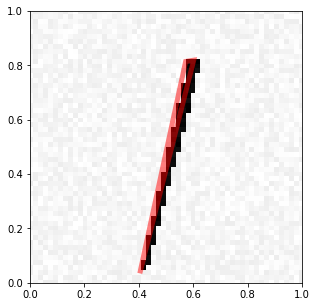

In [111]:
visualize_prediction(X_train[0], Y_train[0])

In [156]:
from keras.models import Sequential
from keras.layers import Dense, Activation
nb_neurons1 = 6
model_regression = Sequential([
#     Dense(nb_neurons1, input_shape=(X_train.shape[1],)),
    Conv2D(16, (5, 5), input_shape=(IMAGE_SIZE, IMAGE_SIZE, 1)),
    Activation('relu'),
    MaxPooling2D((2, 2)),
#     Conv2D(64, (5, 5)),
#     Activation('relu'),
#     MaxPooling2D((2, 2)),
    Conv2D(128, (5, 5)),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
#     Dense(1024),
#     Activation('relu'),
    Dense(nb_neurons1),
#     Activation('softmax'),
])

In [157]:
model_regression.compile(loss='mean_squared_error',
                   optimizer='adam',
                  )

In [158]:
epochs=25

In [159]:
X_train_carre = X_train.reshape(-1, IMAGE_SIZE, IMAGE_SIZE, 1)

In [160]:
model_regression.fit(X_train_carre, Y_train, epochs=epochs, batch_size=32)

Epoch 1/25
300/300 [==============================] - 2s 7ms/step - loss: 1155.9631
Epoch 2/25
300/300 [==============================] - 1s 5ms/step - loss: 540.9282
Epoch 3/25
300/300 [==============================] - 1s 5ms/step - loss: 466.4806
Epoch 4/25
300/300 [==============================] - 1s 5ms/step - loss: 450.4251
Epoch 5/25
300/300 [==============================] - 1s 5ms/step - loss: 439.3267
Epoch 6/25
300/300 [==============================] - 1s 5ms/step - loss: 429.1510
Epoch 7/25
300/300 [==============================] - 1s 5ms/step - loss: 406.0098
Epoch 8/25
300/300 [==============================] - 1s 5ms/step - loss: 366.8195
Epoch 9/25
300/300 [==============================] - 1s 5ms/step - loss: 318.1160
Epoch 10/25
300/300 [==============================] - 1s 5ms/step - loss: 307.7446
Epoch 11/25
300/300 [==============================] - 1s 5ms/step - loss: 313.5270
Epoch 12/25
300/300 [==============================] - 1s 5ms/step - loss: 303.4259


In [161]:
model_regression.evaluate(X_test.reshape(-1, IMAGE_SIZE, IMAGE_SIZE, 1), (Y_test * IMAGE_SIZE))

300/300 [==============================] - 1s 3ms/step


354.2421398925781

In [162]:
model_regression.predict(X_test[0].reshape(-1, IMAGE_SIZE, IMAGE_SIZE, 1))

array([[51.6079  , 39.06712 , 52.134884, 44.11731 , 57.892864, 43.54731 ]],
      dtype=float32)

In [163]:
(Y_test * IMAGE_SIZE)[0]

array([67.77607628, 67.54904442, 48.71644082, 19.84080789, 26.1650831 ,
       23.91642159])